In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set the graphs to show in the jupyter notebook
%matplotlib inline

#set seaborn graphs to a better style
sns.set(style="ticks")

In [0]:
path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv"

online_rt = pd.read_csv(path, encoding='latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


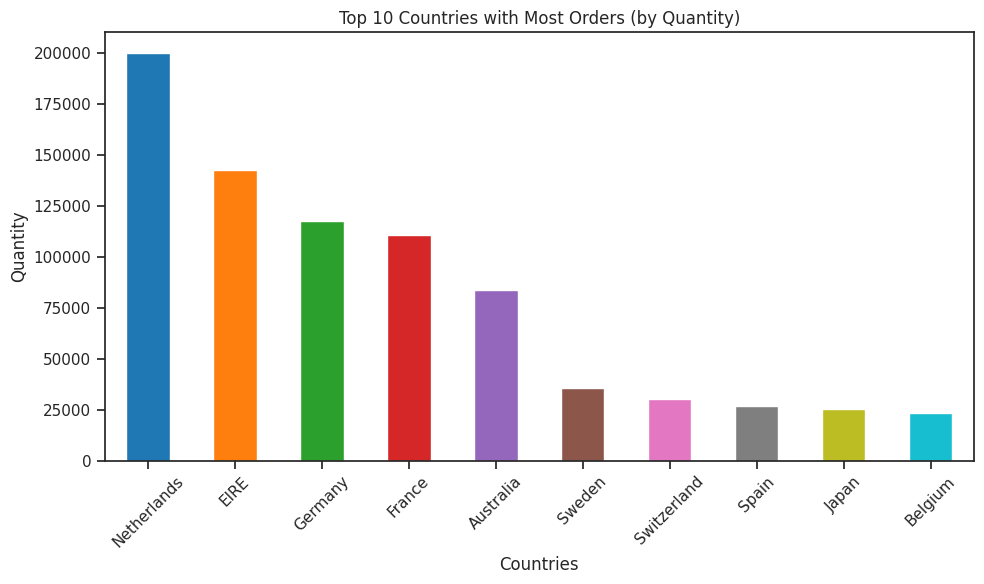

In [0]:
countries = online_rt.groupby("Country").sum(numeric_only=True)
top_countries = countries.sort_values(by="Quantity", ascending=False)[1:11]
colors = plt.cm.tab10.colors  # 10 distinct colors from matplotlib's colormap

# Plotting
top_countries["Quantity"].plot(kind="bar", figsize=(10, 6) , color=colors)
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.title("Top 10 Countries with Most Orders (by Quantity)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
online_rt=online_rt[online_rt.Quantity>0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


/home/spark-55aee4f5-c29f-43cd-b79d-4c/.ipykernel/3024/command-8558324867195259-3705669682:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer= online_rt.groupby(['CustomerID','Country']).sum()
/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


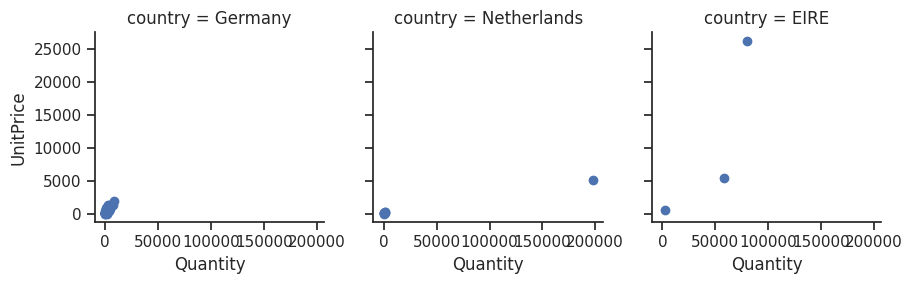

In [0]:
#groupby id 
customer= online_rt.groupby(['CustomerID','Country']).sum()
#there is an outlier with negative price
customer=customer[customer.UnitPrice>0]
#get the value of the index and put in the column country
customer['country']=customer.index.get_level_values(1)
#top there countries
top_countries=['Netherlands','EIRE','Germany']
#filter the dataframe to just select ones in the to_counteries
customer=customer[customer['country'].isin(top_countries) ]
#################

# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customer, col='country')

#map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

#adds legend
g.add_legend()



In [0]:
#This takes our initial dataframe groups it primarily by 'CustomerID' and secondarily by 'Country'.

#It sums all the (non-indexical) columns that have numerical values under each group.

customers = online_rt.groupby(['CustomerID','Country']).sum().head()

#Here's what it looks like:

customers

/home/spark-55aee4f5-c29f-43cd-b79d-4c/.ipykernel/3024/command-5431427422371213-1731542383:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers = online_rt.groupby(['CustomerID','Country']).sum().head()


,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


In [0]:
display(online_rt[online_rt.CustomerID == 12347.0].
 sort_values(by='UnitPrice', ascending = False).head())
display(online_rt[online_rt.CustomerID == 12346.0].
 sort_values(by='UnitPrice', ascending = False).head())

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [0]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv"
online_rt = pd.read_csv(url, encoding='ISO-8859-1')

# Group by Country and sum Quantity
sales_volume = online_rt.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Exclude top country (UK) and get next 3
top3 = sales_volume.index[1:4]

print("Top 3 countries by Quantity (excluding UK):")
print(top3)

Top 3 countries by Quantity (excluding UK):
Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')


In [0]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [0]:
grouped =online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

/home/spark-55aee4f5-c29f-43cd-b79d-4c/.ipykernel/3024/command-5431427422371218-450168572:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,236,708.37,3.001568,Germany
12468.0,Germany,364,724.04,1.989121,Germany
12471.0,Germany,7965,18740.92,2.352909,Germany
12472.0,Germany,4020,6229.48,1.549622,Germany


/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


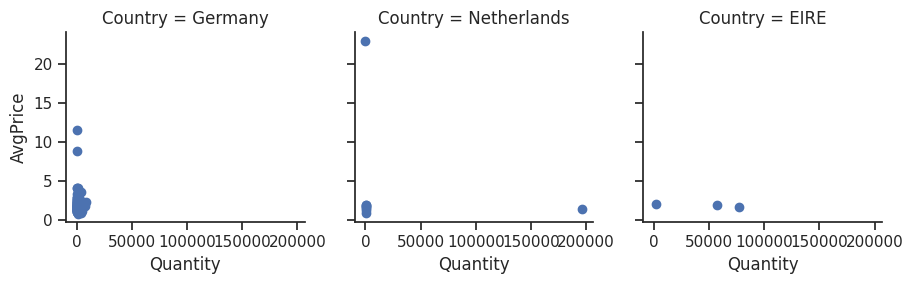

In [0]:
####################
# Graph Section v 2#
####################
# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")
# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)
# adds legend
g.add_legend();

/home/spark-55aee4f5-c29f-43cd-b79d-4c/.ipykernel/3024/command-5431427422371220-3393147691:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


[]

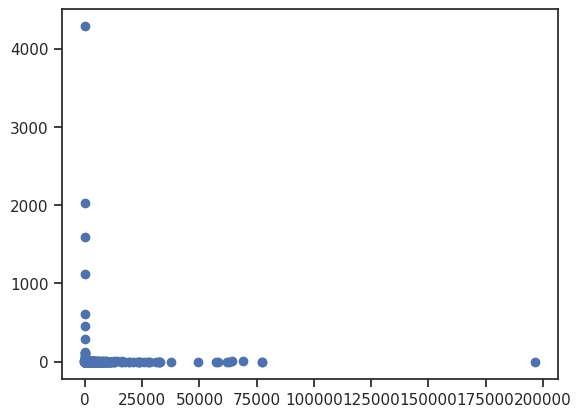

In [0]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()
#Turns out the graph is still extremely skewed towards the axes like an exponential decay function
[]

[]

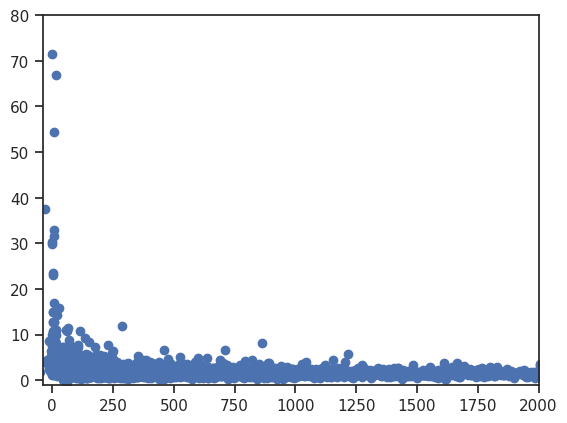

In [0]:
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
 'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000) 
plt.ylim(-1,80)
plt.plot()
#And there is still that pattern, this time in close-up!
[]

In [0]:
customers.UnitPrice.dtype

dtype('float64')

In [0]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0
price_end = 50
price_interval = 1
#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)
#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice,buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1089068.414
(1, 2]    2557511.340
(2, 3]    1803381.940
(3, 4]     849919.340
(4, 5]    1199346.770
Name: Revenue, dtype: float64

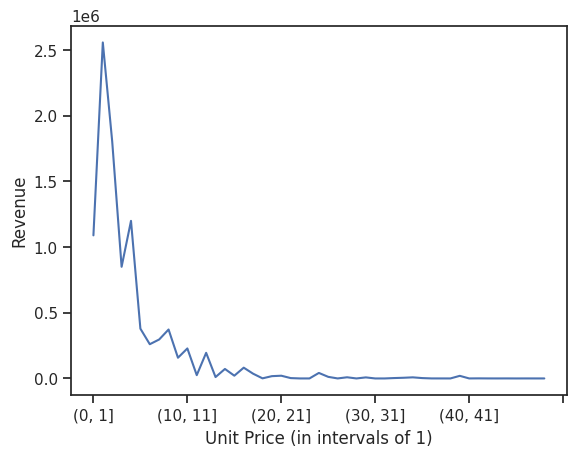

In [0]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

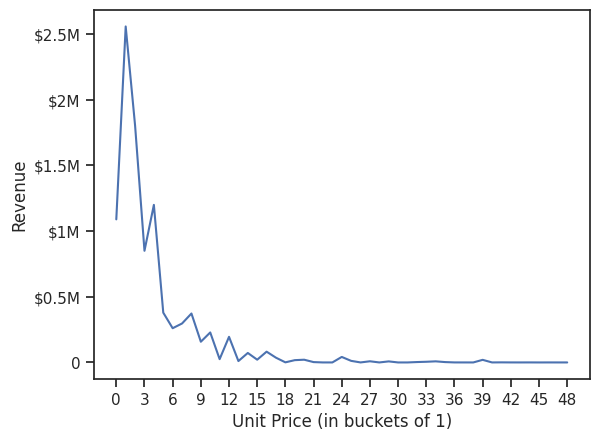

In [0]:
revenue_per_price.plot()
#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')
#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
 np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
 ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()
#Looks like a major chunk of our revenue comes from items worth $0-$3!